## #5: Drunks

The binomial distribution for one walk:

$$
P(N, n) = \binom N n p^n (1-p)^{N-n}
$$

for $N$ steps taken, $n$ steps to the right, $N-n$ steps to the left, and probability $p= \frac{1}{2}$. 

Our drunk's net right displacement $m$ is then $$n - (N-n) = 2n -N.$$

That's the distribution that describes the behavior of one drunk. 

But we can rewrite that in terms of net right displacement, substituting $n= \frac{N+m}{2}$:

$$
P(N, m) = \binom{N}{\frac{N+m}{2}} p^{\frac{N+m}{2}} (1-p)^{\frac{N-m}{2}}
$$

And of course we can simplify further, since $p = \frac{1}{2}$:
$$
P (N, m) = \binom{N}{\frac{N+m}{2}} 2^{-N}
$$

But we can imagine two drunks as one drunk that "alternates direction". 

Here is an arbitrary set of drunk paths:

$A:\quad \rightarrow$ $\rightarrow$ $\rightarrow$ $\leftarrow$

$B: \quad \rightarrow$ $\leftarrow$ $\leftarrow$ $\rightarrow$

Drunk $A$ went a net displacement of 2, where drunk $B$ went a net displacement of 0. The $AB$-displacement is then $2$. 

Consider now a third drunk $C$, who alternates between following $A$'s footsteps and the reverse of $B$'s footsteps. 

Then, $C$ would take the following path:

$A:\quad \rightarrow$ $\leftarrow$ $\rightarrow$ $\rightarrow$ $\rightarrow$ $\rightarrow$ $\leftarrow$ $\leftarrow$

which is a net displacement of $5 -3 = 2$. And this is true in general! Anytime $A$ moves away from $B$, it is as if $C$ moves away from the origin.

So what does the binomial distribution look like for drunk $C$? Well, he takes $2N$ steps, and we're most interested in the probability for which the $AB$-displacement is zero. From $C$'s perspective, he will arrive at the origin after $N$ steps, so his $m = 0$. And therefore the probability distribution that describes his walk is:

$$
\boxed{P (2N, 0) = \binom {2N} {N} 2^{-2N}}
$$


Sanity check:

In [3]:
from scipy.special import comb
def dist(n):
    result = comb(2*n, n) * 0.5**(2*n)
    return float(result)

In [4]:
dist(0) # after zero steps, of course they meet (p = 1)

1.0

In [5]:
dist(1) # after one step they either meet or diverge (p = 1/2)

0.5

In [6]:
dist(2) # three scenarious where they meet, five where they don't (3/8)

0.375

Text(0.5, 1.0, 'Likelihood of two random walks coinciding')

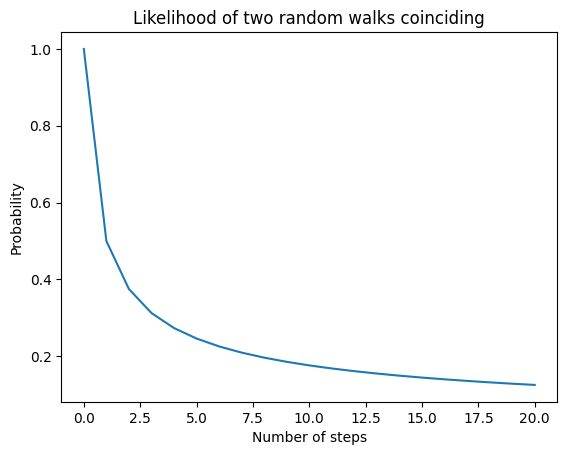

In [7]:
# bonus plot! 
import matplotlib.pyplot as plt
x = list(range(0, 21))
pdf = [dist(n) for n in x]
plt.plot(x, pdf)
plt.xlabel("Number of steps")
plt.ylabel("Probability")
plt.title("Likelihood of two random walks coinciding")

# #6: Phone lines

Consider a binomial distribution that describes the number of calls. At $N = 2000$, the binomial will effectively be a Gaussian distribution. 

If each phone user wants 2 minutes per hour, then their probability (or $p$ in this binomial distribution) will be 1/30. 
We can then find the number of phone calls that corresponds to 99% of the cumulative probability, and build that many phone lines. 

This has to be solved numerically, so I figured I might as well do the whole thing numerically:

Text(0.5, 0, 'Callers in an hour')

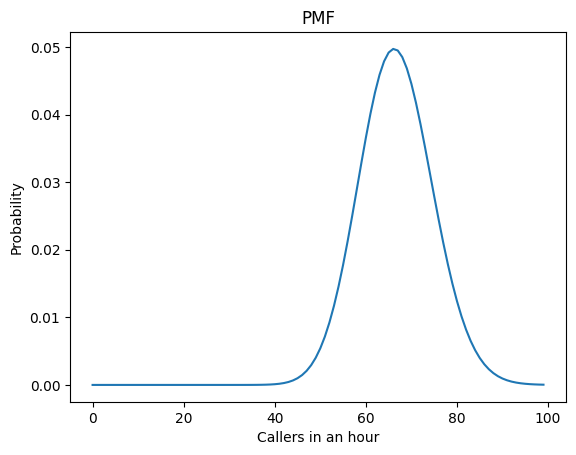

In [8]:
import numpy as np
from scipy.stats import binom
N = 2000 # number of people
p = 1/30 # probability of making a phone call

x = np.arange(0, 100) # arbitrary
pmf = binom.pmf(x, N, p)

plt.plot(x, pmf) # probability mass function
plt.title("PMF")
plt.ylabel("Probability")
plt.xlabel("Callers in an hour")

Text(0.5, 0, 'Callers')

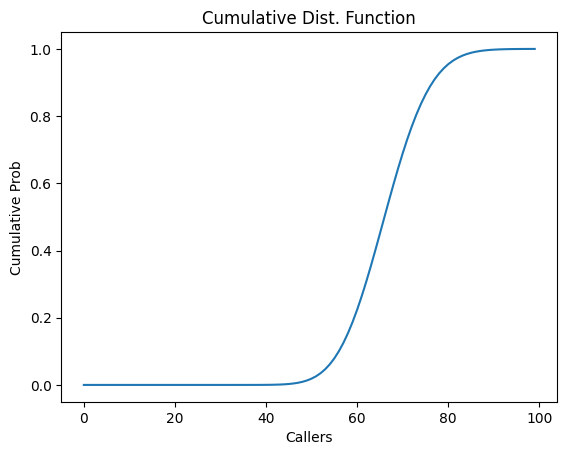

In [9]:
cdf = binom.cdf(x, N, p)
plt.plot(x, cdf)
plt.title("Cumulative Dist. Function")
plt.ylabel("Cumulative Prob")
plt.xlabel("Callers")

So it looks like having 80ish phone lines will accommodate 99% of cases.  \
But what exactly is that number?

In [10]:
x[np.where(cdf >= 0.99)] # the x where cdf >= 0.99

array([86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In other words, we'd need 86 phone lines, at least. 